In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [113]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    f_wb = (w * x[i]) + b
    error = (f_wb - y[i]) ** 2
    cost = cost + error
  total_cost = cost * (1 / 2 * m)
  return total_cost

In [115]:
w=100
b=200
cost = compute_cost(x_train, y_train, w, b)
print(cost)

10000.0


In [116]:
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    f_wb = (w * x[i]) + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_dw += dj_dw_i
    dj_db += dj_db_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db

In [119]:
def gradient_descent(x, y, w_in, b_in, alpha, number_iterations, cost_function, gradient_function):
  w = w_in
  b = b_in
  J_history = []
  parameters_history = []
  for i in range(number_iterations):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    
    b = b - alpha * dj_db
    w = w - alpha * dj_dw

    if i<10000:
      J_history.append(cost_function(x, y, w, b))
      parameters_history.append([w, b])
    if i % math.ceil (number_iterations/10) == 0:
      print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
  return w, b, J_history, parameters_history

In [120]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b):({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 3.17e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 1.37e+01  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 3.17e+00  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 7.37e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 1.71e-01  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 3.98e-02  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 9.24e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 2.15e-03  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 4.99e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 1.16e-04  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


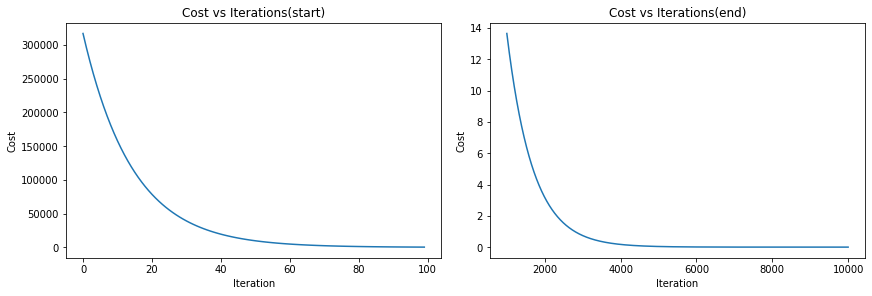

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout = True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs Iterations(start)"); ax2.set_title("Cost vs Iterations(end)")
ax1.set_ylabel("Cost");ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration");ax2.set_xlabel("Iteration")
plt.show()